In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 本文档相关数据集
通过百度网盘分享的文件：titanic.rds，stocks.rda，ExamDatas_NA...等3个文件
链接：https://pan.baidu.com/s/10JIyApeHGtXs56BFIBJXzg?pwd=6868 
 

## 先看一个例子

假设有这么一个数据集：


In [4]:
library(tidyverse)
df = tibble(姓名 =c("刘光磊","王楠","姚明"),单位=c("山东理工","乒协","篮球队"),年收入=c("20万","80万","100万"))
df

# 汉字也可以作为变量名

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


姓名,单位,年收入
<chr>,<chr>,<chr>
刘光磊,山东理工,20万
王楠,乒协,80万
姚明,篮球队,100万


如何提取第三列的收入数值？

In [5]:
df %>% mutate(年收入=parse_number(年收入))


姓名,单位,年收入
<chr>,<chr>,<dbl>
刘光磊,山东理工,20
王楠,乒协,80
姚明,篮球队,100


In [12]:
df = tibble(姓名 =c("刘光磊","王楠","姚明"),单位=c("山东理工","乒协","篮球队"),年收入=c("20万","80万","100万"))
df$年收入 #访问这一列

df %>% mutate(年收入=sub(pattern="万",replacement="",df$年收入)) #修改这一列
 

[1] "20万"  "80万"  "100万"

姓名,单位,年收入
<chr>,<chr>,<chr>
刘光磊,山东理工,20
王楠,乒协,80
姚明,篮球队,100


In [18]:
df %>% mutate(年收入=sub(pattern="万",replacement="",df$年收入)) #正则表达式修改这一列


姓名,单位,年收入
<chr>,<chr>,<chr>
刘光磊,山东理工,20
王楠,乒协,80
姚明,篮球队,100


列联表

对分类变量做描述统计，通常是计算各水平值出现的频数和占比，得到列联表（交叉表）。以上操作可以用table()函数实现，但功能很弱，也不够简洁。

janitor 包提供了更强大的 tabyl()函数，可以生成一个、两个、三个变量的列联表，再结合adorn_*()函数，可以很方便地按想要的格式添加行列的合计和占比等。

.为一维列联表添加合计行，代码如下：

In [4]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# 加载mpg数据集
data("mpg")

In [6]:
library(janitor)
mpg %>%
tabyl (drv) %>%
adorn_totals("row")%>%  # 添加合计行
adorn_pct_formatting()  # 设置百分比格式

,drv,n,percent
,<chr>,<dbl>,<chr>
1,4,103,44.0%
2,f,106,45.3%
3,r,25,10.7%
4,Total,234,100.0%


In [7]:
#为二维列联表添加列占比和频数，代码如下：
mpg %>%
tabyl (drv, cyl) %>%
adorn_percentages ("col") %>% # 添加列占比
adorn_pct_formatting(digits=2) %>%   #设置百分比格式
adorn_ns()  #添加频数
 

,drv,4,5,6,8
,<chr>,<chr>,<chr>,<chr>,<chr>
1,4,28.40% (23),0.00% (0),40.51% (32),68.57% (48)
2,f,71.60% (58),100.00% (4),54.43% (43),1.43% (1)
3,r,0.00% (0),0.00% (0),5.06% (4),30.00% (21)


In [9]:
titanic = read_rds("/kaggle/input/titanic-rds/titanic.rds")
tbl = titanic %>%
  janitor::tabyl(Survived,Pclass)
tbl
rstatix::chisq_test(titanic$Survived,titanic$Pclass)

Survived,1,2,3
<fct>,<dbl>,<dbl>,<dbl>
No,80,97,372
Yes,136,87,119


,n,statistic,p,df,method,p.signif
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
X-squared,891,102.889,4.55e-23,2,Chi-square test,****


In [11]:
library(rstatix)
pairwise_prop_test(as.matrix(tbl[,-1]))


Attaching package: ‘rstatix’


The following object is masked from ‘package:janitor’:

    make_clean_names


The following object is masked from ‘package:stats’:

    filter




,group1,group2,p,p.adj,p.adj.signif
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,2,2.32e-03,2.32e-03,**
2,1,3,1.21e-22,3.64e-22,****
3,2,3,1.22e-08,2.45e-08,****


In [12]:
mpg %>%
anova_test(displ ~ drv) # 方差分析

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,drv,2,231,109.816,3.03e-34,*,0.487



## 一些语法细节

保存和载入数据
`
save(x, file = "data/dat.Rda")
 load("data/dat.Rda")
 `
 
 
 通过百度网盘分享的文件：dat.Rda，stocks.rda，ExamDatas_NAs.xlsx等3个文件
链接：https://pan.baidu.com/s/1eKt2n8V4dP7IAru3iggtYg?pwd=6868 
 

1. 赋值

• R标准语法中赋值不是用 =,而是 <-或->
 

In [1]:
x <- 1:10
 x + 2


[1]  3  4  5  6  7  8  9 10 11 12

注：R 也允许用 =赋值，建议用更现代和简洁的 =赋值。


 清屏和清除内存变量
 
• Ctrl + L 或单击命令窗口右上角的小刷子可对命令窗口清屏。

• 清除当前变量：

rm(x)
 # 清除变量 x
 
 rm(list = ls(all = TRUE)) # 清除所有当前变量
 
注：单击 Environment 窗口的小刷子也是清除所有当前变量。

1.数值向量

•数值向量就是由数值组成的向量，单个数值是长度为1的数值向量


In [2]:
x = 1.5
 x
  
 numeric(10) #长度为10的全0向量
 
 

[1] 1.5

[1] 0 0 0 0 0 0 0 0 0 0

•函数c()实现将多个对象合并到一起

In [3]:

c(1, 2, 3,4,5)
  
 c(1, 2, c(3, 4, 5)) #将多个数值向量合并成一个数值向量

[1] 1 2 3 4 5

[1] 1 2 3 4 5

•创建等差的数值向量


In [4]:
1:5 #同seq(5)或seq(1,5)
  
 seq(1,10,2) #从1开始,到10结束,步长为2
  
 seq(3,length.out= 10)

[1] 1 2 3 4 5

[1] 1 3 5 7 9

[1]  3  4  5  6  7  8  9 10 11 12

  创建重复的数值向量


In [5]:
x = 1:3
 rep(x, 2)
  
 rep(x, each = 2)
  
 rep(x, c(2, 1, 2))

[1] 1 2 3 1 2 3

[1] 1 1 2 2 3 3

[1] 1 1 2 3 3

访问向量子集

即访问向量的一些特定元素或者某个子集。注意，R中的索引是从1开始的。

•使用元素的位置来访问：



In [6]:
v1 = c(1,2, 3, 4)
 v1[2] #第2个元素
v1[2:4] #第2-4个元素
v1[-3] #除了第3个之外的元素
v1[3:6] #可以访问不存在的位置，返回`NA`
 

[1] 2

[1] 2 3 4

[1] 1 2 4

[1]  3  4 NA NA

In [7]:
# •位置向量作为索引，注意不能既放正数又放负数：
v1[c(1,3)]
 v1[c(1, 2,-3)] #报错

[1] 1 3

ERROR: Error in v1[c(1, 2, -3)]: only 0's may be mixed with negative subscripts


In [8]:
 #• 这可以引申为“根据条件访问向量子集”：
v1[v1 <= 2] # 同 v1[which(v1 <= 2)] 或 subset(v1, v1<=2)
 v1[v1 ^ 2- v1 >= 2]

[1] 1 2

[1] 2 3 4

对向量元素命名
•可以在创建向量的同时对其每个元素命名



In [9]:
x = c(a=1, b=2, c= 3)
 x
  
 

a b c 
1 2 3

•命名后，就可以通过名字来访问向量元素：


In [10]:
x[c("a", "c")]
 x[c("a", "a","c")] #重复访问也是可以的
x["d"] #访问不存在的名字

a c 
1 3

a a c 
1 1 3

<NA> 
  NA

• 访问或修改向量名字


In [11]:
names(x)
 # 获取向量元素的名字
 
 names(x) = c("x", "y", "z") # 更改向量元素的名字
names(x) = NULL  # 移除向量元素的名字

[1] "a" "b" "c"

重要: 区分 [] 与 [[]]

• [ ]是提取对象的子集，[[ ]] 是提取对象内的元素。

二者的区别：将一个向量比作10盒糖果，你可以使用 [ ]获取其中的3盒
糖果，使用 [[ ]] 打开盒子并从中取出一颗糖果。

 对向量排序
 
• sort(): 对向量排序，默认 decreasing = FALSE 表示升序

• order(): 返回元素排好序的索引，以其结果作为索引访问元素，正好
是排好序的向量

• rank(): 返回该向量中各个元素的 “排名”，参数 method 设置相同值的处理方法

• rev()：将向量进行反转

In [12]:
x = c(1,5,8,2,9,7,4)
 sort(x)
 order(x)# 默认升序，排名第 2 的元素在原向量的第 4 个位置
  
 
 
 x[order(x)] # 同 sort(x)

[1] 1 2 4 5 7 8 9

[1] 1 4 7 2 6 3 5

[1] 1 2 4 5 7 8 9

列表（list）

• 列表，可以包含不同类型的对象，甚至可以包括其他列表。列表的灵活
性使得它非常有用。

• 列表最大的好处就是，它能够将多个不同类型的对象打包到一起，使得
可以根据位置和名字访问它们。

• 常用场景：将函数的多个返回值打包到一起作为一个对象返回。

1.创建列表

•用list()将多个不同类型的对象创建为列表：



In [15]:
l0 = list(1, c(TRUE,FALSE),c("a","b", "c"))
l0

[[1]]
[1] 1

[[2]]
[1]  TRUE FALSE

[[3]]
[1] "a" "b" "c"

•在创建列表时，为列表的每个成分指定名字：


In [16]:
l1 = list(A=1,B =c(TRUE,FALSE), C= c("a","b", "c"))
 l1

$A
[1] 1

$B
[1]  TRUE FALSE

$C
[1] "a" "b" "c"

再来区分：[[ ]] 与 [ ]

 • [[ ]] 始终是提取一个元素的内容，列表某一个成分的内容（下一级元
素）

• [ ]始终是提取子集，列表的子集是包含若干成分的子列表（仍是同类
型对象）

2. 从列表中提取成分的内容
`

• 最常用的方法是用 $，通过成分名字来提取该成分下的内容：

l1$y
 l1$m   # 访问不存在的成分 m, 将会返回 NULL
• 用 [[n]] 来提取列表第 n 个成分的内容，n 也可以换成成分的名字：
l1[[2]]   # 同 l1[["y"]]
`

注：用 [[ ]] 提取列表中某个成分的内容更加灵活，可用在函数调用中，通过参数来传递成分索引或名字：

`
p = "y" # 想要提取其内容的成分名字
 l1[[p]]
`

In [17]:
l1$y
 l1$m   # 访问不存在的成分 m, 将会返回 NULL

NULL

NULL

In [18]:
l1[[2]]   # 同 l1[["y"]]

[1]  TRUE FALSE

In [19]:
p = "y" # 想要提取其内容的成分名字
 l1[[p]]

NULL

3. 提取列表子集

• 用 []，可以取出列表中的一些成分，作为一个新的（子）列表。

• [] 中可以用字符向量表示成分名字，用数值向量表示成分位置，或用逻
辑向量指定是否选择，来取出列表成分。



In [20]:
l1["x"]  # 同 l1[1]
 l1[c("x", "z")] # 同 l1[c(1, 3)]

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

列表函数

•as.list()将向量转换成列表：

  

In [21]:
l2 = as.list(c(a= 1,b= 2))
 l2

$a
[1] 1

$b
[1] 2

 数据框（数据表）
 
• R语言中做统计分析的样本数据，都是按数据框类型操作的。

• 数据框是指有若干行和列的数据集，它与矩阵类似，但并不要求所有列
都是相同的类型；

• 本质上讲，数据框就是一个列表，它的每个成分都是一个向量，并且长
度相同，以表格的形式展现。总之，数据框是由列向量组成、有着矩阵形
式的列表。

• 数据框与最常见的数据表是一致的：每一列代表一个变量属性，每一行
代表一条样本数据：

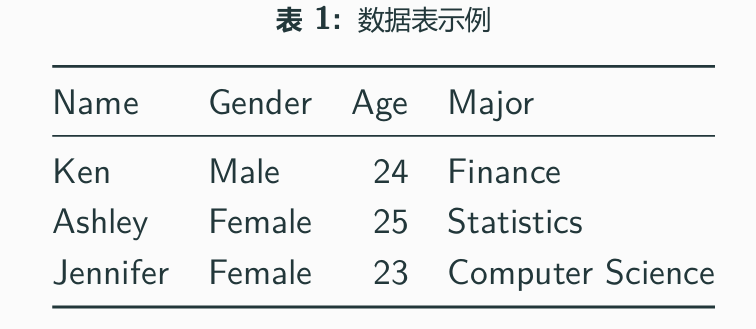



tibble 与 data.frame

 • R自带的数据框是data.frame，建议改用更现代的数据框：
tibble3, tidyverse 包都是基于 tibble 数据框。

• tibble 对比 data.frame 的优势：

• tibble() 比 data.frame() 做的更少：不改变输入变量的类型 (R
 4.0.0 之前默认将字符串转化为因子！) ，不会改变变量名，不会创建行
名；

• tibble 对象的列名可以是 R 中的 “非法名”：非字母开头、包含空格，
但定义和使用变量时都需要用倒引号 ‘括起来；

• tibble 在输出时不自动显示所有行，避免大数据框时显示很多内容；

• 用 []选取列子集时，即使只选取一列，返回结果仍是tibble, 而不自
动简化为向量


1. 创建数据框
• 用 tibble() 根据若干列向量创建 tibble:
 

In [22]:
# 或 library(tibble)
 library(tidyverse)
 persons = tibble(
 Name = c("Ken", "Ashley", "Jennifer"),
 Gender = c("Male", "Female", "Female"),
 Age = c(24, 25, 23),
 Major = c("Finance", "Statistics", "Computer Science"))
 persons

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Name,Gender,Age,Major
<chr>,<chr>,<dbl>,<chr>
Ken,Male,24,Finance
Ashley,Female,25,Statistics
Jennifer,Female,23,Computer Science


• 用 tribble() 按行录入数据式创建 tibble:
 
 • 用 as_tibble() 将 data.frame, matrix, 各成分等长度的
list, 转换为 tibble。

In [23]:
tribble(
 ~Name, ~Gender, ~Age, ~Major,
 "Ken", "Male", 24, "Finance",
 "Ashley", "Female", 25, "Statistics",
 "Jennifer", "Female", 23, "Computer Science")

Name,Gender,Age,Major
<chr>,<chr>,<dbl>,<chr>
Ken,Male,24,Finance
Ashley,Female,25,Statistics
Jennifer,Female,23,Computer Science


• 对数据框的各列重命名：


In [24]:
df = tibble(id = 1:4,
 level = c(0, 2, 1,-1),
 score = c(0.5, 0.2, 0.1, 0.5))
 names(df) = c("id", "x", "y")
 df

id,x,y
<int>,<dbl>,<dbl>
1,0,0.5
2,2,0.2
3,1,0.1
4,-1,0.5


2. 提取数据框的元素、子集
数据框是由列向量组成、有着矩阵形式的列表，所以可以用两种操作方式来访
问数据框的元素和子集。

(1) 以列表方式提取数据框的元素、子集

• 用 $按列名来提取某一列的值，或者用 [[]]按照位置或列名提取



In [25]:
df$x
 
 # 同 df[["x"]], df[[2]]

[1]  0  2  1 -1

•用[]提取数据框的一列或多列，得到子数据框，其内可以是数值向量
（列位置）、字符向量（列名）、逻辑向量（是否选择各列）。


In [26]:
df[1] #提取第1列,同df["id"]

id
<int>
1
2
3
4


In [27]:
df[1:2] # 同 df[c("id","x")]

id,x
<int>,<dbl>
1,0
2,2
3,1
4,-1


(2)以矩阵方式提取数据框的元素、子集

•以列表形式操作并不支持行选择。以矩阵形式操作更加灵活，同时支持
列选择和行选择。即用[i,j]指定行或列来提取数据框子集，[,]
其内可以是数值向量、字符向量或者逻辑向量。

•若行选择器为空，则只选择列（所有行）：



In [28]:
df[, "x"]
  

x
<dbl>
0
2
1
-1


In [29]:
df[, c("x","y")] # 同 df[,2:3]

x,y
<dbl>,<dbl>
0,0.5
2,0.2
1,0.1
-1,0.5


•若列选择器为空，则只选择行（所有列）：


In [30]:
df[c(1,3),]

id,x,y
<int>,<dbl>,<dbl>
1,0,0.5
3,1,0.1


•同时选择行和列：


In [31]:
df[1:3, c("id","y")]

id,y
<int>,<dbl>
1,0.5
2,0.2
3,0.1


• 根据条件筛选行或列：


In [32]:
df[df$y >= 0.5, c("id","y")]

id,y
<int>,<dbl>
1,0.5
4,0.5


给数据框赋值

给数据框赋值，就是选择要赋值的位置，再准备好同样大小且格式匹配的数据，
赋值给那些位置即可，所以同样有列表方式和矩阵方式。

(1) 以列表方式给数据框赋值

• 用 $或 [[ ]]对数据框的1列赋值


In [37]:
df$y = c(0.6,0.3,0.2,0.4)
 # 同 df[["y"]] = c(0.6,0.3,0.2,0.4)
df

id,x,y,z
<int>,<dbl>,<dbl>,<dbl>
1,0,0.6,0.6
2,2,0.3,2.3
3,1,0.2,1.2
4,-1,0.4,-0.6


In [35]:
#•利用现有列，创建（计算）新列：
df$z =df$x +df$y
 df

id,x,y,z
<int>,<dbl>,<dbl>,<dbl>
1,0,0.6,0.6
2,2,0.3,2.3
3,1,0.2,1.2
4,-1,0.4,-0.6


In [38]:
df$z = as.character(df$z) # 转换列的类型
df

id,x,y,z
<int>,<dbl>,<dbl>,<chr>
1,0,0.6,0.6
2,2,0.3,2.3
3,1,0.2,1.2
4,-1,0.4,-0.6


In [40]:
# 用 []可以对数据框的1列或多列进行赋值：
df["y"] = c(0.8,0.5,0.2,0.4)
 df[c("x", "y")] = list(c(1,2,1,0), c(0.1,0.2,0.3,0.4))
df

id,x,y,z
<int>,<dbl>,<dbl>,<chr>
1,1,0.1,0.6
2,2,0.2,2.3
3,1,0.3,1.2
4,0,0.4,-0.6


一些有用函数

•str()或glimpse()作用在R对象上，显示该对象的结构：


In [41]:
str(persons)

tibble [3 × 4] (S3: tbl_df/tbl/data.frame)
 $ Name  : chr [1:3] "Ken" "Ashley" "Jennifer"
 $ Gender: chr [1:3] "Male" "Female" "Female"
 $ Age   : num [1:3] 24 25 23
 $ Major : chr [1:3] "Finance" "Statistics" "Computer Science"


•summary()作用在数据框/列表上，将生成各列/成分的汇总信息：


In [42]:
summary(persons)

     Name              Gender               Age          Major          
 Length:3           Length:3           Min.   :23.0   Length:3          
 Class :character   Class :character   1st Qu.:23.5   Class :character  
 Mode  :character   Mode  :character   Median :24.0   Mode  :character  
                                       Mean   :24.0                     
                                       3rd Qu.:24.5                     
                                       Max.   :25.0                     

 因子（factor）
 
• 数据（变量）可划分为：定量数据（数值型）、定性数据（分类型），定性
数据又分为名义型（无好坏顺序之分，如性别）、有序型（有好坏顺序之
分，如疗效）。

• R提供了因子这一数据结构（容器），专门用来存放名义型和有序型的分
类变量。因子本质上是一个带有水平（level）属性的整数向量，其中 “水
平” 是指事前确定可能取值的有限集合。例如，性别有两个水平：男、女。

• 直接用字符向量也可以表示分类变量，但它只有字母顺序，不能规定想
要的顺序，也不能表达有序分类变量。所以，有必要把字符型的分类变
量转化为因子型，这更便于对其做后续描述汇总、可视化、建模等。

 创建与使用因子

In [43]:
x = c(" 优", " 中", " 良", " 优", " 良", " 良") # 字符向量
x
  
 sort(x)
 # 排序是按字母顺序

[1] " 优" " 中" " 良" " 优" " 良" " 良"

[1] " 中" " 优" " 优" " 良" " 良" " 良"

•若想规定顺序：中、良、优，正确的做法就是创建成因子，用levels
指定想要的顺序：


In [44]:
x1 = factor(x, levels= c("中", "良", "优")) #转化因子型
x1
  
as.numeric(x1) #x的存储形式:整数向量

[1] <NA> <NA> <NA> <NA> <NA> <NA>
Levels: 中 良 优

[1] NA NA NA NA NA NA

注意：不能直接将因子数据当字符型操作，需要用as.character()转化。
 
• 转化为因子型后，数据向量显示出来（外在表现）与原来是一样的，但内
在存储已经变了。因子型是以整数向量存储的，将各水平值按照规定的
顺序分别对应到整数，将原向量的各值分别用相应的整数存储，输出和
使用的时候再换回对应的水平值。整数是有顺序的，这样就相当于在不
改变原数据的前提下规定了顺序，同时也节省了存储空间。

注：标签（labels）是因子水平（levels）的别名。

•变成因子型后，无论是排序、统计频数、绘图等，都有了顺序：


In [45]:
sort(x1)
  
table(x1)

factor()
Levels: 中 良 优

x1
中 良 优 
 0  0  0 

• 示例的成绩数据是有好坏之分的，创建为有序因子：


  
• 如果对 x2做排序、统计频数、绘图，你会发现与无序因子时没有任何
区别。它们的区别体现在对其建模时适用的模型不同。

In [46]:
x2 = factor(x, levels = c(" 中", " 良", " 优"),
 ordered = TRUE)
 x2

[1]  优  中  良  优  良  良
Levels:  中 <  良 <  优

有用函数

•table():统计因子各水平（或向量各元素）的出现次数（频数）


In [47]:
table(x)

x
 中  优  良 
  1   2   3 

## R中的函数
编程中的函数，是用来实现某个功能。很多时候，使用 R 自带的或来自其它
包中的现成函数就够了。

那么，如何找到并使用现成函数解决自己想要解决的问题？比如想做线性回归，
通过 Bing 搜索知道是用自带 lm() 函数实现。那么先打开该函数的帮助：

?lm

执行 ? 函数名，若函数来自扩展包需要事先加载包，则在 Rstudio 右下
角窗口打开函数帮助界面，一般至少包括如下内容：
`
• 函数描述
• 函数语法格式
• 函数参数说明
• 函数返回值
• 函数示例
`

通过阅读函数描述、参数说明、返回值，再调试示例，就能快速掌握该函数的
使用。

函数包含很多参数，常用参数往往只是前几个。比如 lm() 的常用参数是：
`
• formula: 设置线性回归公式形式：因变量 ~ 自变量 + 自变量
• data: 提供数据（框）
`
使用自带的 mtcars 数据集演示，按照函数参数要求的对象类型提供实参：



In [48]:
head(mtcars, 3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [49]:
 model = lm(mpg ~ disp, data = mtcars)
 summary(model)
 # 查看回归汇总结果


Call:
lm(formula = mpg ~ disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
disp        -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


编程中一种重要的思维就是函数式思维，包括自定义函数（把解决某问题的过
程封装成函数）和泛函式编程（把函数依次应用到一系列的对象上）。

如果找不到现成的函数解决自己的问题，那就需要自己自定义函数

## 向量化改进

1. 如何自定义函数

• R中自定义函数的一般格式为：

`函数名 = function(输入 1, ..., 输入 n) {
函数体
return(返回值)
 }`
 
注意，return 并不是必需的，默认函数体最后一行的值作为返回值。


案例：自定义函数实现把百分制分数转化为五级制分数的功能

第一步，分析输入和输出，设计函数外形

• 输入有几个，分别是什么，适合用什么数据结构存放；

• 输出有几个，分别是什么，适合用什么数据结构存放。

本问题，输入有 1 个：百分制分数，数值型；输出有1个：五级制分数，字
符串

• 然后就可以设计自定义函数的外形：


In [50]:
Score_Conv = function(score) {
 if(score >= 90) {
 res = " 优"
 } else if(score >= 80) {
 res = " 良"
 } else if(score >= 70) {
 res = " 中"
 } else if(score >= 60) {
 res = " 及格"
 } else {
 res = " 不及格"
 }
 res
 }
    

2. 调用函数

要调用自定义函数，必须要先加载到当前变量窗口（内存），有两种方法：

• 需要选中并执行函数代码，或者

• 将函数保存为同名的 Score_Conv.R 文件，执行



In [51]:
#source("Score_Conv.R")
#然后就可以调用函数：
Score_Conv(76)

[1] " 中"

改进自定义函数，使其能接受向量输入，即输入多个百分制分数，能一下都转
化为五级分数。

方法一：修改自定义函数

• 将输入参数设计为数值向量，函数体也要相应的修改，借助循环依次处
理向量中的每个元素，就相当于再套一层 for 循环。


In [52]:
Score_Conv2 =function(score) {
  n =length(score)
  res= vector("character",n)
  for(i in 1:n){
    if(score[i] >= 90) {
      res[i] = "优"
    }else if(score[i] >= 80){
      res[i] = "良"
    }else if(score[i] >= 70){
      res[i] = "中"
    }else if(score[i] >= 60){
     res[i] = "及格"
     } else {
 res[i] = " 不及格"
 }
 }
 res
 }

In [53]:
# 测试函数
scores = c(35, 67, 100)
 Score_Conv2(scores)

[1] " 不及格" "及格"    "优"

方法二：借助 apply 族或 map 系列函数

• apply 族或 map 系列函数，可实现依次” 应用” 某函数，到序列的每
个元素上。

• 也就是说，不需要修改原函数，直接就能实现向量化操作：


In [54]:
scores = c(35, 67, 100)
 map_chr(scores, Score_Conv)

[1] " 不及格" " 及格"   " 优"

用特殊的...参数，它可以接受任意多个对象，并打包为一个列表
传递它们：


注：很多R自带函数都在用...这样传递参数。

In [55]:
dots_sum =function(...){
 sum(...)
 }
 dots_sum(1)
  
 dots_sum(1, 2, 3,4,5)
  

[1] 1

[1] 15

处理多个返回值

• R中若自定义函数需要有多个返回值，则将多个返回值打包成一个列表
（或数据框），再返回。

• 例如，自定义函数，实现计算一个数值向量的均值和标准差：



In [56]:
MeanStd = function(x) {
 mu = mean(x)
 std = sqrt(sum((x-mu)^2) / (length(x)-1))
 list(mu = mu, std = std)
 }
  
# 测试函数
x = c(2, 6, 4, 9, 12)
 MeanStd(x)

$mu
[1] 6.6

$std
[1] 3.974921

## 生成随机数
• 自然界中的随机现象是真正随机发生不可重现的，计算机中模拟随机现
象，包括生成随机数、随机抽样并不是真正的随机，而是可以重现的。通
过设置为相同的起始种子值就可以重现，故称为 “伪随机”。


In [57]:
set.seed(123)# 设置随机种子, 以重现随机结果
 rnorm(5, 0, 1) # 生成 5 个服从 N(0,1) 分布的随机数

[1] -0.56047565 -0.23017749  1.55870831  0.07050839  0.12928774

随机抽样

•sample(x,size,replace=FALSE,prob):从向量中重复或

非重复地随机抽样



In [58]:
set.seed(123)
 #模拟抛10次硬币
sample(c("正","反"), 10, replace=TRUE)
  
#随机生成1~10的某排列
sample(1:10, 10,replace=FALSE)

[1] "正" "正" "正" "反" "正" "反" "反" "反" "正" "正"

[1]  4  6  1  2  3  5  9 10  8  7

匹配两个标志之间的内容

• 适合想要匹配的内容没有规律性，但该内容位于两个有规律性的标志之
间，标志也可以是开始和结束。

• 通常想要匹配的内容不包含两边的“标志”，这就需要用零宽断言。简单
来说，就是一种引导语法告诉既要匹配到 “标志”，但又不包含 “标志”。
• 左边标志的引导语法是(?<= 标志)，右边标志的引导语法是 (?=
标志)，而真正要匹配的内容放在它们中间。


• 比如，来自问卷星“来自IP” 数据，想要提取 IP、省份：


In [59]:
x = c("175.10.237.40(湖南-长沙)",
 "114.243.12.168(北京-北京)",
 "125.211.78.251(黑龙江-哈尔滨)")
 # 提取省份
str_extract(x, "\\(.*-")
 # 对比，不用零宽断言

[1] "(湖南-"   "(北京-"   "(黑龙江-"

In [60]:
str_extract(x, "(?<=\\().*(?=-)") # 用零宽断言

[1] "湖南"   "北京"   "黑龙江"

In [61]:
 # 提取 IP
 # str_extract(x, "\\d.*\\d") # 直接匹配
 str_extract(x, "^.*(?=\\()")  # 用零宽断言

[1] "175.10.237.40"  "114.243.12.168" "125.211.78.251"

In [62]:
#•用零宽断言提取专业（位于“级”和数字之间）：
x = c("18级能源动力工程2班","19级统计学1班")
 str_extract(x, "(?<=级).*?(?=[0-9])")

[1] "能源动力工程" "统计学"

## R 循环的三层境界：
• 第一层：for 循环、while 循环、repeat 循环

• 第二层：apply 函数族


• 第三层：purrr 泛函式编程

关于跳出循环：

• 用关键字next 跳出本次循环，进入下次循环

• 用关键词break 跳出循环

自带循环迭代

1. for循环 

(1)基本for循环


In [64]:
library(tidyverse)
 df = as_tibble(iris[,1:4])
 df

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2


In [65]:
# 用“复制-粘贴”法，计算前4列的均值：
mean(df[[1]])
  
 mean(df[[2]])
  
 mean(df[[3]])
  
 mean(df[[4]])

[1] 5.843333

[1] 3.057333

[1] 3.758

[1] 1.199333

•为了避免“粘贴-复制多于两次”，改用for循环实现：


In [66]:
output = vector("double", 4) #1.输出
for (i in 1:4){ #2.迭代器
output[i] =mean(df[[i]]) #3.循环体
}
 output

[1] 5.843333 3.057333 3.758000 1.199333

 ### apply 函数族
• 更建议弃用 apply 函数族，直接用 purrr::map 系列。

(1) apply(x, MARGIN, FUN, ...)

 • 对矩阵、数据框、多维数组，按行或列或页进行循环迭代，即将逐行或逐
列或逐页的元素分别传递给函数 FUN 进行迭代计算。

• MARGIN：1 表示按行，2 表示按列，3 表示按页；




In [67]:
x = matrix(1:6, ncol= 3)
 x
  
 apply(x,1,mean) #按行求均值
 
 apply(x,2,mean) #按列求均值
 
 apply(df,2,mean) #对前文df计算各列的均值

1,3,5
2,4,6


[1] 3 4

[1] 1.5 3.5 5.5

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

(2) tapply(x, INDEX, FUN, ...)

 • 按照因子分组，实现逐分组迭代


In [68]:
height = c(165, 170, 168, 172, 159)
 sex = factor(c(" 男", " 女", " 男", " 男", " 女"))
 tapply(height, sex, mean) # 计算男女平均身高

女       男 
164.5000 168.3333

(3) lapply(x, FUN, ...)

 • 对向量、列表、数据框逐元、逐成分、逐列分别应用函数 FUN，并返回
和 x长度相同的 list 对象


In [69]:
lapply(df, mean)
  
 # 对前文 df 计算各列的均值

$Sepal.Length
[1] 5.843333

$Sepal.Width
[1] 3.057333

$Petal.Length
[1] 3.758

$Petal.Width
[1] 1.199333

 purrr 泛函式循环迭代
 
• 数学上，函数的函数称为泛函；编程中，表示函数作用在函数上，或者说
函数包含其他函数作为参数

• 循环迭代，本质上就是将一个函数依次应用（映射）到序列的每一个元
素上，表示出来即 purrr::map_*(x, f)

 • 两点说明：
 
• 序列：由一系列可以根据位置索引的元素构成，元素可以很复杂和不同类
型；向量、列表、数据框都是序列

• 将 x作为第一个参数，是便于使用管道

• purrr 泛函式编程解决循环迭代问题的逻辑：

• 针对序列每个单独的元素，怎么处理它得到正确的结果，将之定义为函
数，再 map 到序列中的每一个元素，将得到的多个结果2打包到一起返
回，并且可以根据想让结果返回什么类型选用 map 后缀。

• 循环迭代返回类型的控制：

• map_chr, map_lgl, map_dbl, map_int: 返回相应类型向量

• map_dfr, map_dfc: 返回数据框列表，再按行、按列合并为一个数据框

• purrr 风格公式（匿名函数）：函数参数.f 的一种简写；只需要写清楚它是如何操作序列参数.x 的

• 一元函数序列参数为.x, 例如 𝑓(𝑥)=𝑥2+1 表示为.f = ~ .x ^
 2 + 1
 
 • 二元函数序列参数为.x, .y, 例如 𝑓(𝑥,𝑦)=𝑥2−3𝑦 表示为.f =
 ~ .x ^ 2- 3 * .y
 
 • 还有三元函数序列参数: ..1, ..2, ..3, 所有序列参数...
 
注： .x 是序列中的一个（代表）元素。这也是分解的思维，循环迭代要依次
对序列中每个元素做某操作，只需要把对一个元素做的操作写清楚（即.f），
剩下的交给 map_*() 就行了。

• map_*(.x, .f, ...): 依次应用一元函数.f 到一个序列.x 的每个
元素，... 可设置.f 的其它参数
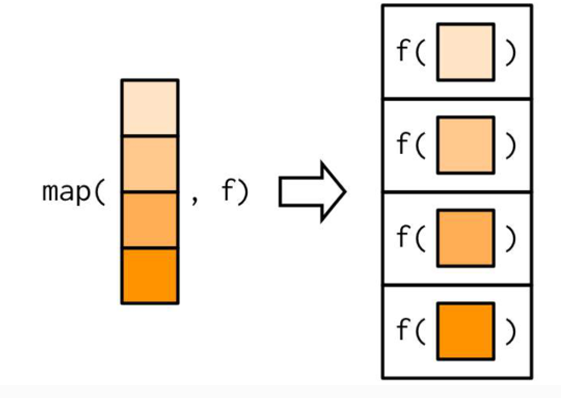

图 3: map 函数作用机制示意图

 
• map2_*(.x, .y, .f, ...): 依次应用二元函数.f 到两个序
列.x, .y 的每对元素，... 可设置.f 的其它参数

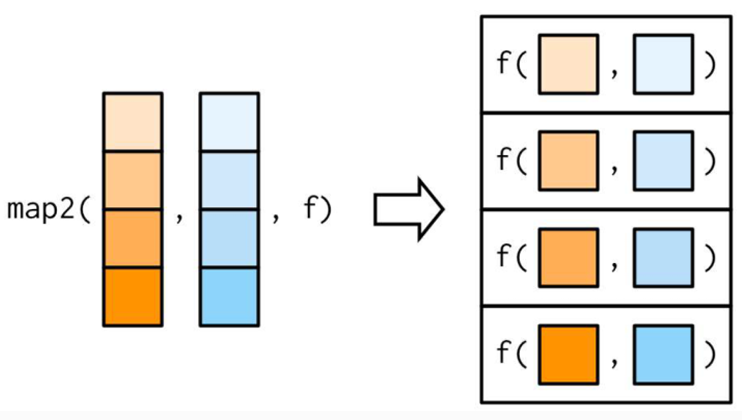

 map2 函数作用机制示意图
 
 例3对数据框逐列迭代
 
•数据框是序列，第1个元素是第1列df[[1]],第2个元素是第2
列df[[2]],……
 

In [70]:
df = iris[,1:4]
 map_dbl(df,mean) #求各列均值

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

In [71]:
 map_chr(df,mean)

Warning message:
“Automatic coercion from double to character was deprecated in purrr 1.0.0.
ℹ Please use an explicit call to `as.character()` within `map_chr()` instead.”


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
  "5.843333"   "3.057333"   "3.758000"   "1.199333"

In [72]:
#自定义归一化函数
Rescale =function(x,type = "pos"){
 rng= range(x,na.rm =TRUE) #计算最小值最大值
if(type== "pos"){
 (x-rng[1]) / (rng[2]-rng[1])
 } else{
 (rng[2]-x) / (rng[2]-rng[1])
 }
 }
 33
# 对各列做归一化, 若均为正向指标：
map_dfc(df, Rescale)

[1] 33

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000
0.08333333,0.5833333,0.06779661,0.08333333
0.19444444,0.5833333,0.08474576,0.04166667
0.02777778,0.3750000,0.06779661,0.04166667


## 管道操作
• magrittr 包引入了管道操作%>%1（现在 R 4.1 也开始支持管道
|>），能够通过管道将数据从一个函数传给另一个函数，从而用若干函数
构成的管道依次变换你的数据：

x %>% f() %>% g()

 • 表示依次对数据进行若干操作：先对数据 x进行 f操作，接着对结果
数据进行 g操作

• 使用管道的好处：

• 避免使用过多的中间变量

• 程序可读性大大增强：对数据集依次进行一系列操作


•对数据集mtcars，先按分类变量cyl分组，再对连续变量mpg做
分组汇总计算均值：


In [73]:
mtcars %>%
 group_by(cyl) %>%
 summarise(mpg_avg= mean(mpg))

cyl,mpg_avg
<dbl>,<dbl>
4,26.66364
6,19.74286
8,15.10000


In [74]:
# 管道，也支持baseR函数：
month.abb %>% #内置月份名缩写字符向量
sample(6) %>%
 tolower() %>%
 str_c(collapse= "|")

[1] "sep|dec|mar|aug|feb|jul"

•对比非管道操作，读起来与操作的过程是相反的：


In [75]:
str_c(tolower(sample(month.abb,6)), collapse="|")

[1] "oct|sep|mar|apr|jun|jan"

常用的管道操作
(1) 管道默认将数据传给下一个函数的第 1 个参数，且它可以省略


这种机制使得代码看起来就是：从数据开始，依次用函数对数据施加一系列的
操作（变换数据），各个函数都直接从非数据参数开始写即可，而不用再额外
操心数据的事情，数据会自己沿管道向前 “流动”

In [76]:
c(1, 3, 4, 5, NA) %>%
 mean(., na.rm = TRUE)
 c(1, 3, 4, 5, NA) %>%
 mean(na.rm = TRUE) # 建议写法
 # "." 可以省略

[1] 3.25

[1] 3.25

正是这种管道操作，使得 tidyverse 能够优雅地操作数据. 因此，tidyverse 中的函
数都设计为数据作为第 1 个参数，自定义的函数也建议这样做.
  
(2) 数据可以在下一个函数中使用多次

• 若在非第1个参数处使用该数据，必须用”.” 代替（绝对不能省略），这使得管道作用更加强大和灵活

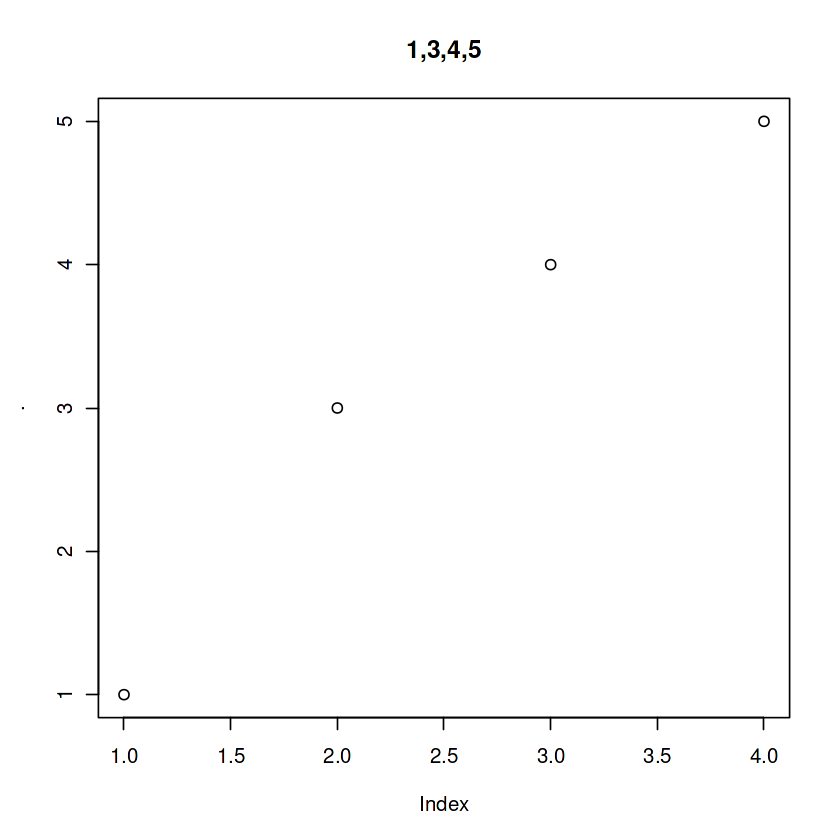

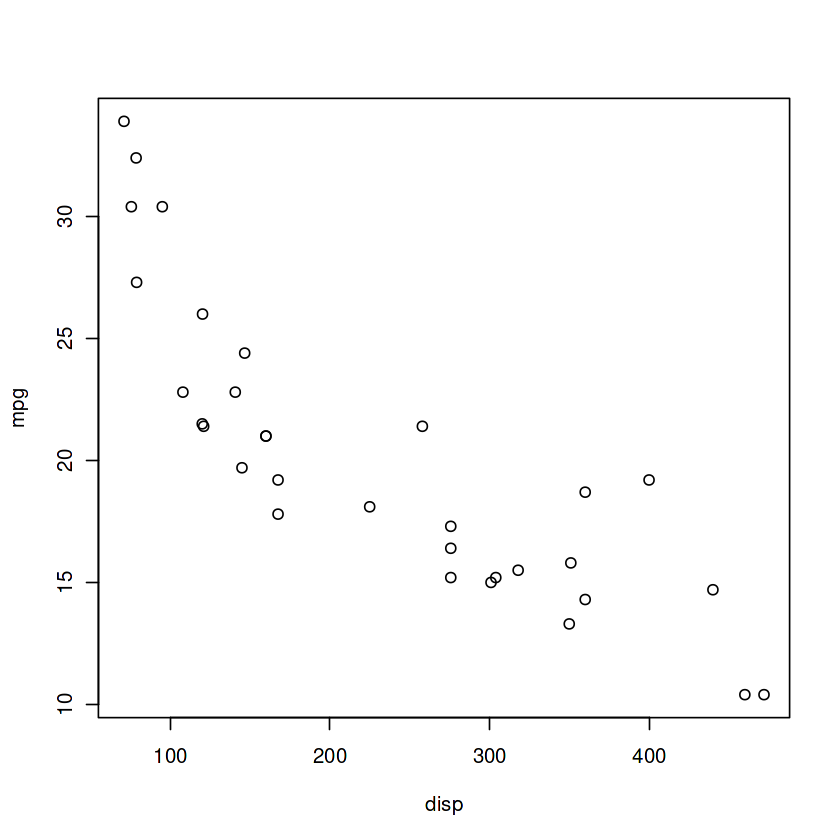

In [77]:
# 数据传递给 plot 第一个参数作为绘图数据 (. 省略),
 # 同时用于拼接成字符串给 main 参数用于图形标题
c(1, 3, 4, 5) %>%
 plot(main = str_c(., collapse=","))
 # 数据传递给第二个参数 data
 mtcars %>% plot(mpg ~ disp, data = .)
 # 选择列
#iris %>% .$Species # 选择 Species 列内容
# iris %>% pull(Species) # 同上
# iris %>% .[1:3] # 选择 1-3 列子集
 



• 分组批量建模：将数据框根据分类变量分组，再用map 循环机制依次对
每组数据建立线性回归模型

注：这里.x 将传入每一组数据。建议区分：. 用于管道操作中代替数据；.x用于 purrr 风格公式（匿名函数）。

In [78]:
mtcars %>%
 group_split(cyl) %>%
 #map(~ lm(mpg ~ wt, data = .x))
map(\(.) lm(mpg ~ wt,data=.))

[[1]]

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


[[2]]

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


[[3]]

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



https://github.com/tidyverse/tidyverse
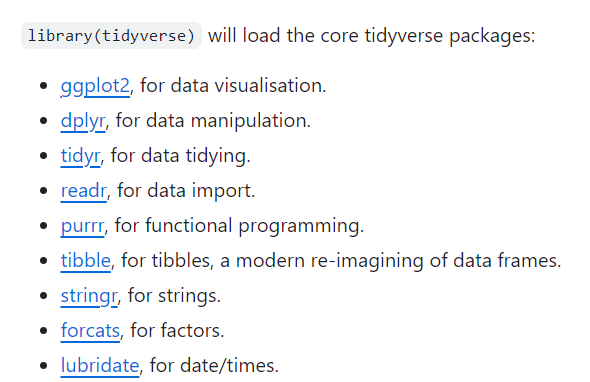


https://tidyverse.tidyverse.org/

https://dplyr.tidyverse.org/

`dplyr is a grammar of data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges:

mutate() adds new variables that are functions of existing variables
select() picks variables based on their names.
filter() picks cases based on their values.
summarise() reduces multiple values down to a single summary.
arrange() changes the ordering of the rows.`


https://purrr.tidyverse.org/

`Map family
The map(.x, .f) functions transforms each element of the vector .x with the function .f, returning a vector defined by the suffix (_lgl, _chr() etc). walk() is a variant for functions called primarily for their side-effects; it returns .x invisibly.`

## 一. apply 函数族

https://purrr.tidyverse.org/

• 更建议弃用 apply 函数族（除了 apply()），直接用 purrr::map系列。

(1) apply(x, MARGIN, FUN, ...)

 • 对矩阵、数据框、多维数组，按行或列或页进行循环迭代，即将逐行或逐列或逐页的元素分别传递给函数 FUN 进行迭代计算。
 
• MARGIN：1 表示按行，2 表示按列，3 表示按页；


In [79]:
(x= matrix(1:6,ncol= 3))

1,3,5
2,4,6


In [80]:
apply(x,1,mean) #按行求均值
 
 apply(x,2,mean) #按列求均值
 
 

[1] 3 4

[1] 1.5 3.5 5.5

In [81]:
df = iris[1:4]
 apply(df,2,mean) #计算df各列的均值

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

tapply(x, INDEX, FUN, ...)

   按照因子分组，实现逐分组迭代

In [82]:

height = c(165, 170, 168, 172, 159)
 sex = factor(c(" 男", " 女", " 男", " 男", " 女"))
 tapply(height, sex, mean) # 计算男女平均身高

女       男 
164.5000 168.3333

## 二. purrr 泛函式循环迭代 
purrr 泛函式循环迭代的优势：

本质上就是将一个函数依次应用（映射）到序列的每一个元素上， 表示出来即 purrr::map_*(x, f) 

• 两点说明：

• 序列：由一系列可以根据位置索引的元素构成，元素可以很复杂和不同类 型；向量、列表、数据框都是序列 
 
• 将 x作为第一个参数，是便于使用管道  

map 循环迭代，是一种分解的思维，要依次对序列中每个元素做某操作，只需要把对一个元素做的操作写成函数（即.f），剩下的交给 map_*() 就行了

map 循环迭代解决问题的一般逻辑：

• 一系列的对象，通常以序列形式存放（可按位置索引）：向量、列表、数据框。

• 从序列取出一个元素（代表），处理它得到正确的结果，将之定义为函数，再 map 到序列中的每一个元素，将得到的多个结果( 每个元素作用后返回一个结果)打包到一起返回，并且可以根据想让结果返回什么类型选用 map 后缀。

• 循环迭代返回类型的控制：

• map_chr, map_lgl, map_dbl, map_int：返回相应类型向量

了解：purrr 风格公式

• purrr 风格公式（匿名函数）：函数参数.f 的一种简写；只需要写清楚它是如何操作序列参数.x 的

• 一元函数序列参数为.x，例如 𝑓(𝑥)=𝑥^2+1 表示为.f = ~ .x ^ 2 + 1

 • 二元函数序列参数为.x, .y，例如 𝑓(𝑥, 𝑦)=𝑥^2−3𝑦 表示为.f = ~ .x ^ 2- 3 * .y
 
 • 多元函数序列参数：...，函数体中可整体使用...，也可分开使用..1, ..2, ..3,

小练习

1. 身高数据（厘米）：165, 170, 168, 172, 159，单位转化成米。
2. 现有 3 个身份证号："11022119920110474X",
 "230702198105052397", "142625199601063388"，
(1) 提取生日，
(2) 进一步转化成日期。
3. 根据列名"mpg", "disp", "am", "gear", 从 mtcars 中选择列。
4. 生成 10 组标准正态分布的随机数（每组 100 个数）

In [83]:
#练习1
 library(tidyverse)
 height = c(165, 170, 168, 172, 159)
 map_dbl(height, \(x) x / 100)

[1] 1.65 1.70 1.68 1.72 1.59

In [84]:
#练习2
 IDCard = c("11022119920110474X", "230702198105052397",
 "142625199601063388")
 map_vec(IDCard, \(x) str_sub(x, 7, 14) |> ymd())

[1] "1992-01-10" "1981-05-05" "1996-01-06"

In [85]:
#练习3
 vars = c("mpg", "disp", "am", "gear")
 map_dfc(vars, \(x) mtcars[[x]]) |>
 set_names(vars)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`


mpg,disp,am,gear
<dbl>,<dbl>,<dbl>,<dbl>
21.0,160.0,1,4
21.0,160.0,1,4
22.8,108.0,1,4
21.4,258.0,0,3
18.7,360.0,0,3
18.1,225.0,0,3
14.3,360.0,0,3
24.4,146.7,0,4
22.8,140.8,0,4


In [86]:
#练习4
 set.seed(123)
 map_dfc(1:10, \(x) rnorm(n = 100)) |>
 set_names(str_c("x", 1:10))

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`


x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.56047565,-0.71040656,2.19881035,-0.71524219,-0.07355602,-0.60189285,1.07401226,-0.728219111,0.35628334,-1.01411417
-0.23017749,0.25688371,1.31241298,-0.75268897,-1.16865142,-0.99369859,-0.02734697,-1.540442405,-0.65801021,-0.79131388
1.55870831,-0.24669188,-0.26514506,-0.93853870,-0.63474826,1.02678506,-0.03333034,-0.693094614,0.85520221,0.29959368
0.07050839,-0.34754260,0.54319406,-1.05251328,-0.02884155,0.75106130,-1.51606762,0.118849433,1.15293623,1.63905191
0.12928774,-0.95161857,-0.41433995,-0.43715953,0.67069597,-1.50916654,0.79038534,-1.364709458,0.27627456,1.08461701
1.71506499,-0.04502772,-0.47624689,0.33117917,-1.65054654,-0.09514745,-0.21073418,0.589982679,0.14410466,-0.62456747
0.46091621,-0.78490447,-0.78860284,-2.01421050,-0.34975424,-0.89594782,-0.65674293,0.289344029,-0.07562508,0.82592290
-1.26506123,-1.66794194,-0.59461727,0.21198043,0.75640644,-2.07075107,-1.41202579,-0.904215026,2.16141585,-0.04856835
-0.68685285,-0.38022652,1.65090747,1.23667505,-0.53880916,0.15012013,-0.29976250,0.226324942,0.27631553,0.30131365


小练习
1. 身高数据（厘米）：165, 170, 168, 172, 159，体重数据（千克）：
82, 68, 50, 66, 70，计算 BMI。
2. 生成九九乘法表（提示：expand_grid）。

In [87]:
#练习1
 height = c(165, 170, 168, 172, 159)
 weight = c(82, 68, 50, 66, 70)
 map2_dbl(height, weight, \(h, w) w / (h / 100) ^ 2)

[1] 30.11938 23.52941 17.71542 22.30936 27.68878

In [88]:
#练习2
 df = expand_grid(x = 1:9, y = 1:9)
 map2_chr(df$x, df$y,
 \(x, y) str_glue("{x} × {y} = {x * y}"))

[1] "1 × 1 = 1"  "1 × 2 = 2"  "1 × 3 = 3"  "1 × 4 = 4"  "1 × 5 = 5" 
 [6] "1 × 6 = 6"  "1 × 7 = 7"  "1 × 8 = 8"  "1 × 9 = 9"  "2 × 1 = 2" 
[11] "2 × 2 = 4"  "2 × 3 = 6"  "2 × 4 = 8"  "2 × 5 = 10" "2 × 6 = 12"
[16] "2 × 7 = 14" "2 × 8 = 16" "2 × 9 = 18" "3 × 1 = 3"  "3 × 2 = 6" 
[21] "3 × 3 = 9"  "3 × 4 = 12" "3 × 5 = 15" "3 × 6 = 18" "3 × 7 = 21"
[26] "3 × 8 = 24" "3 × 9 = 27" "4 × 1 = 4"  "4 × 2 = 8"  "4 × 3 = 12"
[31] "4 × 4 = 16" "4 × 5 = 20" "4 × 6 = 24" "4 × 7 = 28" "4 × 8 = 32"
[36] "4 × 9 = 36" "5 × 1 = 5"  "5 × 2 = 10" "5 × 3 = 15" "5 × 4 = 20"
[41] "5 × 5 = 25" "5 × 6 = 30" "5 × 7 = 35" "5 × 8 = 40" "5 × 9 = 45"
[46] "6 × 1 = 6"  "6 × 2 = 12" "6 × 3 = 18" "6 × 4 = 24" "6 × 5 = 30"
[51] "6 × 6 = 36" "6 × 7 = 42" "6 × 8 = 48" "6 × 9 = 54" "7 × 1 = 7" 
[56] "7 × 2 = 14" "7 × 3 = 21" "7 × 4 = 28" "7 × 5 = 35" "7 × 6 = 42"
[61] "7 × 7 = 49" "7 × 8 = 56" "7 × 9 = 63" "8 × 1 = 8"  "8 × 2 = 16"
[66] "8 × 3 = 24" "8 × 4 = 32" "8 × 5 = 40" "8 × 6 = 48" "8 × 7 = 56"
[71] "8 × 8 = 64" "8 × 9 = 72" "9 × 1 = 9"  "9 × 2 = 18" "9 × 3 = 27"
[76] "9 × 4 = 36" "9 × 5 = 45" "9 × 6 = 54" "9 × 7 = 63" "9 × 8 = 72"
[81] "9 × 9 = 81"

## 数据操作 I: 选择列修改列
用 dplyr 包实现各种数据操作，通常的数据操作无论多么复杂，往往都可以
分解为 5 种基本数据操作的组合：

• select() —— 选择列

• filter()/slice() —— 筛选行

• arrange() —— 对行排序

• mutate() —— 修改列/创建新列

• summarize() —— 汇总

它们都可以与
• group_by() —— 分组

连用，以改变数据操作的作用域：

作用在整个数据框，还是分别作用在数据框的每个分组
 
这些函数组合使用就足以完成各种数据操作，它们的相同之处是：

• 第 1 个参数是数据框，方便管道操作

• 根据列名访问数据框的列，且列名不用加引号

• 返回结果是一个新数据框，不改变原数据框

从而，可以方便地实现：
将多个简单操作，依次用管道连接，实现复杂的数据操作


• 若要同时对所选择的多列数据应用函数，还有强大的 across() 函数，它
支持各种选择列语法，搭配 mutate() 和 summarise() 使用，产
生非常强大同时修改/汇总多列的效果；

### 选择列

• 选择列，包括对数据框做选择列、调整列序、重命名列。

• 以虚拟的学生成绩数据来演示，包含随机生成的 20 个 NA：

In [89]:

library(readxl)
df = read_xlsx("/kaggle/input/examdatas-nas/ExamDatas_NAs.xlsx")
df

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


1. 选择列语法
(1) 用列名或索引选择列


In [90]:
df %>%
select(name, sex, math) # 或者 select(2, 3, 5)

name,sex,math
<chr>,<chr>,<dbl>
何娜,女,92
黄才菊,女,77
陈芳妹,女,87
陈学勤,男,79
陈祝贞,女,79
何小薇,女,73
雷旺,男,80
陈欣越,男,80
黄亦婷,女,NA


(2) 借助运算符选择列

• 用: 选择连续的若干列

• 用! 选择变量集合的余集（反选）

• &和|选择变量集合的交或并

• c() 合并多个选择


(3) 借助选择助手函数

• 选择指定列：

• everything(): 选择所有列

• last_col(): 选择最后一列，可以带参数，如 last_col(5) 选择倒
数第 6 列


• 选择列名匹配的列：

• starts_with(): 以某前缀开头的列名

• ends_with(): 以某后缀结尾的列名

• contains(): 包含某字符串的列名

• matches(): 匹配正则表达式的列名

• num_range(): 匹配数值范围的列名，如 num_range("x", 1:3)
匹配 x1, x2, x3

2. 一些选择列的示例
df %>%
select(starts_with("m"))

In [91]:
 
df %>%
select(starts_with("m"))  #以m开头的列

math,moral
<dbl>,<dbl>
92,9
77,NA
87,9
79,9
79,8
73,8
80,8
80,9
NA,8


In [92]:
# 根据条件（逻辑判断）选择列，例如选择所有数值型的列：
df %>%
select(where(is.numeric))

chinese,math,english,moral,science
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87,92,79,9,10
95,77,75,NA,9
79,87,66,9,10
NA,79,66,9,10
76,79,67,8,10
83,73,65,8,9
NA,80,68,8,9
57,80,60,9,9
77,NA,54,8,10


Tidyverse 优雅编程：从向量化、泛函式到数据思维 - 统计之都的文章 - 知乎
https://zhuanlan.zhihu.com/p/654430464

In [93]:
df %>%
 select(ends_with("e"))

name,chinese,science
<chr>,<dbl>,<dbl>
何娜,87,10
黄才菊,95,9
陈芳妹,79,10
陈学勤,NA,10
陈祝贞,76,10
何小薇,83,9
雷旺,NA,9
陈欣越,57,9
黄亦婷,77,10


In [94]:
df %>%
 select(contains("a"))

class,name,math,moral
<chr>,<chr>,<dbl>,<dbl>
六1班,何娜,92,9
六1班,黄才菊,77,NA
六1班,陈芳妹,87,9
六1班,陈学勤,79,9
六1班,陈祝贞,79,8
六1班,何小薇,73,8
六1班,雷旺,80,8
六1班,陈欣越,80,9
六1班,黄亦婷,NA,8


•根据正则表达式匹配选择列：


In [95]:
df %>%
 select(matches("m.*a"))

math,moral
<dbl>,<dbl>
92,9
77,NA
87,9
79,9
79,8
73,8
80,8
80,9
NA,8


In [96]:
 #自定义返回 TRUE 或 FALSE 的判断函数，支持 purrr 风格公式
df[, 4:8] %>% # 选择列和 > 3000 的列
#select(where(~ sum(.x, na.rm = TRUE) > 3000)) 
#where(): 应用一个函数到所有列，选择返回结果为 TRUE 的列，比如与 is.numeric 等函数连
select(where(\(x) sum(x,na.rm =TRUE) > 3000 )) #lambda函数，匿名函数新语法

chinese,math
<dbl>,<dbl>
87,92
95,77
79,87
NA,79
76,79
83,73
NA,80
57,80
77,NA


用”-“删除列


In [97]:
df %>%
 select(-c(name,chinese, science))

class,sex,math,english,moral
<chr>,<chr>,<dbl>,<dbl>,<dbl>
六1班,女,92,79,9
六1班,女,77,75,NA
六1班,女,87,66,9
六1班,男,79,66,9
六1班,女,79,67,8
六1班,女,73,65,8
六1班,男,80,68,8
六1班,男,80,60,9
六1班,女,NA,54,8


In [98]:
df %>%
 # 选择唯一值数目 < 10 的列
select(where(~ n_distinct(.x) < 10))

class,sex,moral,science
<chr>,<chr>,<dbl>,<dbl>
六1班,女,9,10
六1班,女,NA,9
六1班,女,9,10
六1班,男,9,10
六1班,女,8,10
六1班,女,8,9
六1班,男,8,9
六1班,男,9,9
六1班,女,8,10


调整列的顺序

In [99]:
#列是根据被选择的顺序排列：
df %>%
 select(ends_with("e"),math,name,class,sex)

name,chinese,science,math,class,sex
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
何娜,87,10,92,六1班,女
黄才菊,95,9,77,六1班,女
陈芳妹,79,10,87,六1班,女
陈学勤,NA,10,79,六1班,男
陈祝贞,76,10,79,六1班,女
何小薇,83,9,73,六1班,女
雷旺,NA,9,80,六1班,男
陈欣越,57,9,80,六1班,男
黄亦婷,77,10,NA,六1班,女


In [100]:
#everything()返回未被选择的所有列，将某一列移到第一列时很方便：
df %>%
 select(math, everything())

math,class,name,sex,chinese,english,moral,science
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
92,六1班,何娜,女,87,79,9,10
77,六1班,黄才菊,女,95,75,NA,9
87,六1班,陈芳妹,女,79,66,9,10
79,六1班,陈学勤,男,NA,66,9,10
79,六1班,陈祝贞,女,76,67,8,10
73,六1班,何小薇,女,83,65,8,9
80,六1班,雷旺,男,NA,68,8,9
80,六1班,陈欣越,男,57,60,9,9
NA,六1班,黄亦婷,女,77,54,8,10


•relocate(.data,...,.before,.after):将选择的列移到
某列之前或之后


In [101]:
df %>% #将数值列移到name列的后面
relocate(where(is.numeric), .after= name)

class,name,chinese,math,english,moral,science,sex
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
六1班,何娜,87,92,79,9,10,女
六1班,黄才菊,95,77,75,NA,9,女
六1班,陈芳妹,79,87,66,9,10,女
六1班,陈学勤,NA,79,66,9,10,男
六1班,陈祝贞,76,79,67,8,10,女
六1班,何小薇,83,73,65,8,9,女
六1班,雷旺,NA,80,68,8,9,男
六1班,陈欣越,57,80,60,9,9,男
六1班,黄亦婷,77,NA,54,8,10,女


 重命名列
 
• set_names(): 为所有列设置新列名


In [102]:
df %>%
 set_names(" 班级", " 姓名", " 性别", " 语文",
 " 数学", " 英语", " 品德", " 科学")

班级,姓名,性别,语文,数学,英语,品德,科学
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


•rename():只修改部分列名，格式为：新名=旧名


In [103]:
df %>%
 rename(数学= math,科学= science)

class,name,sex,chinese,数学,english,moral,科学
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


•rename_with(.data,.fn,.cols):用函数.fn变化选中列的
列名


In [104]:
df %>% #为所选列名增加前缀
rename_with(\(x) paste0("new_",  x), matches("m"))

class,new_name,sex,chinese,new_math,english,new_moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


 强大的 across() 函数
 
• across() 人如其名，让零个/一个/多个函数穿过所选择的列，即同时
对所选择的多列应用若干函数，基本格式为：

across(.cols = everything(), .fns = NULL, ..., .names)

 • .cols 根据选择列语法选定的列；
 
• .fns 为应用到选定列上的函数1：

• NULL：不对列作变换；

• 一个函数，如mean;

 • 一个purrr 风格的匿名函数，如 ~ .X * 10
 
 • 多个函数或匿名函数构成的列表
 
• .names 设置输出列的列名样式，默认为 {col}_{fn}。若想保留旧
列，则需要设置该参数，否则，将使用原列名，即计算的新列将替换旧列。

 across() 包含了分解思维：想要同时修改多列，只需要选出多列，把
对一列做的事情写成函数，剩下的交给 across() 就行了。

### 二.修改列
修改列，即修改数据框的列，计算新列。

1.创建新列

•mutate()创建或修改列2，返回原数据框并增加新列，默认加在最后
一列，参数.before,.after可以设置新列的位置。

In [105]:
df %>% #只给新列1个值,循环使用
mutate(new_col= 5,.before = chinese)

class,name,sex,new_col,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,5,87,92,79,9,10
六1班,黄才菊,女,5,95,77,75,NA,9
六1班,陈芳妹,女,5,79,87,66,9,10
六1班,陈学勤,男,5,NA,79,66,9,10
六1班,陈祝贞,女,5,76,79,67,8,10
六1班,何小薇,女,5,83,73,65,8,9
六1班,雷旺,男,5,NA,80,68,8,9
六1班,陈欣越,男,5,57,80,60,9,9
六1班,黄亦婷,女,5,77,NA,54,8,10


•正常是以长度等于行数的向量赋值：

In [106]:

df %>%
 mutate(new_col= 1:n())

class,name,sex,chinese,math,english,moral,science,new_col
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
六1班,何娜,女,87,92,79,9,10,1
六1班,黄才菊,女,95,77,75,NA,9,2
六1班,陈芳妹,女,79,87,66,9,10,3
六1班,陈学勤,男,NA,79,66,9,10,4
六1班,陈祝贞,女,76,79,67,8,10,5
六1班,何小薇,女,83,73,65,8,9,6
六1班,雷旺,男,NA,80,68,8,9,7
六1班,陈欣越,男,57,80,60,9,9,8
六1班,黄亦婷,女,77,NA,54,8,10,9


注：n()返回当前分组的样本数,未分组则为总行数。

2.计算新列

•用数据框的现有列计算新列，若修改当前列，只需要赋值给原列名


In [107]:
df %>%
 mutate(total= chinese+ math+ english+moral + science)

class,name,sex,chinese,math,english,moral,science,total
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10,277
六1班,黄才菊,女,95,77,75,NA,9,NA
六1班,陈芳妹,女,79,87,66,9,10,251
六1班,陈学勤,男,NA,79,66,9,10,NA
六1班,陈祝贞,女,76,79,67,8,10,240
六1班,何小薇,女,83,73,65,8,9,238
六1班,雷旺,男,NA,80,68,8,9,NA
六1班,陈欣越,男,57,80,60,9,9,215
六1班,黄亦婷,女,77,NA,54,8,10,NA


In [108]:
df %>%
 mutate(total= sum(chinese,math, english,moral , science))

class,name,sex,chinese,math,english,moral,science,total
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10,NA
六1班,黄才菊,女,95,77,75,NA,9,NA
六1班,陈芳妹,女,79,87,66,9,10,NA
六1班,陈学勤,男,NA,79,66,9,10,NA
六1班,陈祝贞,女,76,79,67,8,10,NA
六1班,何小薇,女,83,73,65,8,9,NA
六1班,雷旺,男,NA,80,68,8,9,NA
六1班,陈欣越,男,57,80,60,9,9,NA
六1班,黄亦婷,女,77,NA,54,8,10,NA


注意：不能用sum(),它会将整个列的内容都加起来，类似的还有mean()
等。

• 在同一个 mutate() 中可以同时创建或计算多个列，它们是从前往后
依次计算，所以可以使用前面新创建的列

In [109]:
df %>%
 mutate(med = median(math, na.rm = TRUE),
 label = math > med,
 label = as.numeric(label))

class,name,sex,chinese,math,english,moral,science,med,label
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10,73,1
六1班,黄才菊,女,95,77,75,NA,9,73,1
六1班,陈芳妹,女,79,87,66,9,10,73,1
六1班,陈学勤,男,NA,79,66,9,10,73,1
六1班,陈祝贞,女,76,79,67,8,10,73,1
六1班,何小薇,女,83,73,65,8,9,73,0
六1班,雷旺,男,NA,80,68,8,9,73,1
六1班,陈欣越,男,57,80,60,9,9,73,1
六1班,黄亦婷,女,77,NA,54,8,10,73,NA


3.修改多列

结合across()和选择列语法可以应用函数到多列，从而实现同时修改多
列。

(1)应用函数到所有列

•将所有列转化为字符型


In [110]:
df %>%
 mutate(across(everything(),as.character))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


(2)应用函数到满足条件的列

•对所有数值列做归一化


In [111]:
rescale=function(x){
     rng=range(x,na.rm=TRUE)
     (x-rng[1]) / (rng[2]-rng[1])
 }
df %>%
 mutate(across(where(is.numeric),rescale))

 

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,0.84313725,0.97368421,1.0000000,0.875,1.0000000
六1班,黄才菊,女,1.00000000,0.77631579,0.9259259,NA,0.8333333
六1班,陈芳妹,女,0.68627451,0.90789474,0.7592593,0.875,1.0000000
六1班,陈学勤,男,NA,0.80263158,0.7592593,0.875,1.0000000
六1班,陈祝贞,女,0.62745098,0.80263158,0.7777778,0.750,1.0000000
六1班,何小薇,女,0.76470588,0.72368421,0.7407407,0.750,0.8333333
六1班,雷旺,男,NA,0.81578947,0.7962963,0.750,0.8333333
六1班,陈欣越,男,0.25490196,0.81578947,0.6481481,0.875,0.8333333
六1班,黄亦婷,女,0.64705882,NA,0.5370370,0.750,1.0000000


(3) 应用函数到指定的列

• 将 iris 中的列名包含 length 和 width 的列的测量单位从厘米变
成毫米：



In [112]:
as_tibble(iris) %>%
 mutate(across(contains("Length") | contains("Width"),
 \(x)  x * 10))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,35,14,2,setosa
49,30,14,2,setosa
47,32,13,2,setosa
46,31,15,2,setosa
50,36,14,2,setosa
54,39,17,4,setosa
46,34,14,3,setosa
50,34,15,2,setosa
44,29,14,2,setosa


4. 替换 NA

 (1) replace_na()
 
实现用某个值替换一列中的所有 NA值，该函数接受一个命名列表，其成分为

列名 = 替换值。

• 替换具体的列的缺失值


In [113]:
df %>%
 replace_na(list(chinese=60))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,60,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,60,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


5.重新编码

(1)两类别情形：if_else():做二分支判断进而重新编码


In [114]:
df %>%
 mutate(sex= if_else(sex == "男","M","F"))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,F,87,92,79,9,10
六1班,黄才菊,F,95,77,75,NA,9
六1班,陈芳妹,F,79,87,66,9,10
六1班,陈学勤,M,NA,79,66,9,10
六1班,陈祝贞,F,76,79,67,8,10
六1班,何小薇,F,83,73,65,8,9
六1班,雷旺,M,NA,80,68,8,9
六1班,陈欣越,M,57,80,60,9,9
六1班,黄亦婷,F,77,NA,54,8,10


(2) 多类别情形：case_when(): 做多分支判断进而重新编码，避免使用很
多 if_else() 嵌套

In [115]:

df %>%
 mutate(math = case_when(math >= 75 ~ "High",
 math >= 60 ~ "Middle",
 TRUE
 ~ "Low"))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,High,79,9,10
六1班,黄才菊,女,95,High,75,NA,9
六1班,陈芳妹,女,79,High,66,9,10
六1班,陈学勤,男,NA,High,66,9,10
六1班,陈祝贞,女,76,High,67,8,10
六1班,何小薇,女,83,Middle,65,8,9
六1班,雷旺,男,NA,High,68,8,9
六1班,陈欣越,男,57,High,60,9,9
六1班,黄亦婷,女,77,Low,54,8,10


### 筛选行分组汇总
• 筛选行，即按行选择数据子集，包括过滤行、对行切片、删除行。



In [116]:
library(readxl)
 
df = read_xlsx("/kaggle/input/examdatas-nas/ExamDatas_NAs.xlsx")
 
 set.seed(123)
 df_dup = df %>%
 # 创建一个包含重复行的数据框
slice_sample(n = 60, replace = TRUE)
df_dup

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六2班,陈华健,男,92,84,70,9,10


1.用filter()根据条件筛选行
•筛选条件可以是长度同行数的逻辑向量，更一般的是基于能返回这样逻
辑向量的列表达式


In [117]:
df_dup %>%
 filter(sex== "男",math >80) #注：多个条件之间用“,”隔开，相当于and.

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六2班,陈华健,男,92,84,70,9,10
六2班,陈华健,男,92,84,70,9,10
六4班,NA,男,84,85,52,9,8
六2班,陈华健,男,92,84,70,9,10
六4班,李小龄,男,90,87,69,10,10
六4班,李小龄,男,90,87,69,10,10
六4班,杨昌晟,男,84,85,64,8,10
NA,徐达政,男,90,86,72,9,10


In [118]:
df_dup %>%
 filter(sex== "女",(is.na(english) |math >80))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,陆曼,女,88,84,69,8,10
六2班,徐雅琦,女,92,86,72,NA,9
六5班,陆曼,女,88,84,69,8,10
六5班,符苡榕,女,85,89,76,9,NA
六2班,徐雅琦,女,92,86,72,NA,9
六4班,陈丽丽,女,87,93,NA,8,6


In [119]:
df_dup %>%
 filter(between(math, 70, 80)) #闭区间

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六2班,杨远芸,女,93,80,68,9,10
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六1班,陈祝贞,女,76,79,67,8,10
六1班,陈欣越,男,57,80,60,9,9
六1班,雷旺,男,NA,80,68,8,9
六4班,林传顺,男,85,75,52,NA,9
六2班,林师满,男,70,74,25,8,10
六5班,容唐,女,83,71,56,9,7


 限定列范围内，筛选”所有值都满足某条件的行”
 
 •选出第4-6列范围内，所有值都>75的行：


In [120]:
df %>%
 filter(if_all(4:6,~ .x >75))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六4班,周婵,女,92,94,77,10,9
六5班,符苡榕,女,85,89,76,9,NA


In [121]:
#选出所有列范围内，所有值都不是NA的行
df_dup %>%
 filter(if_all(everything(),~!is.na(.x)))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六2班,陈华健,男,92,84,70,9,10


In [122]:
#选出数值列范围内，存在值>90的行
df %>%
 filter(if_any(where(is.numeric), ~ .x> 90))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六2班,黄祖娜,女,94,88,75,10,10
六2班,徐雅琦,女,92,86,72,NA,9
六2班,陈华健,男,92,84,70,9,10
六2班,杨远芸,女,93,80,68,9,10
六4班,周婵,女,92,94,77,10,9
六4班,陈丽丽,女,87,93,NA,8,6


In [123]:
# 从字符列范围内，选择包含（存在）NA的行
df_dup %>%
 filter(if_any(where(is.character),is.na))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,NA,男,84,85,52,9,8
NA,徐达政,男,90,86,72,9,10
六5班,符芳盈,NA,58,85,48,9,10


另一种思路

•pmap_lgl()是对数据框逐行迭代，返回长度同行数的逻辑值向量，正
好适合配合filter()筛选行：

•第1个参数，是多列范围构成的数据框；

•第2个参数，是对多列范围内的每行的值向量，构造一个返回一个逻辑
值的判断函数，作为是否筛选该行的依据

例如，筛选出语文、数学、英语三科成绩中恰有两科成绩不及格的行：


In [124]:
df %>%
 filter(pmap_lgl(.[4:6], \(...) sum(c(...) <60)== 2))#...指所有参数

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六2班,黄菲,女,90,41,40,6,7
六2班,李永升,男,66,54,36,8,10
六3班,陈逾革,男,47,24,67,2,5
六4班,梁少盈,女,90,55,52,8,9
六5班,符芳盈,NA,58,85,48,9,10


对行切片：slice_*()

 slice就是对行切片的意思，该系列函数的共同参数：
 
•n:用来指定要选择的行数

•prop:用来指定选择的行比例



In [125]:
slice(df,3:7) #选择3-7行


class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9


slice(df,3:7) #选择3-7行

slice_head(df,n, prop) #从前面开始选择若干行

slice_tail(df,n, prop) #从后面开始选择若干行

#根据order_by选择最小的若干行

slice_min(df,order_by,n, prop)

 #根据order_by选择最大的若干行
 
slice_max(df,order_by,n, prop)

 slice_sample(df,n, prop) #随机选择若干行
 

In [126]:
#选择math列值中前5大的行
df %>%
 slice_max(math, n=5)

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六4班,陈丽丽,女,87,93,NA,8,6
六1班,何娜,女,87,92,79,9,10
六5班,符苡榕,女,85,89,76,9,NA
六2班,黄祖娜,女,94,88,75,10,10


4.删除行

(1)distinct():删除重复行

•根据所有列判定重复，只保留第1个，删除其余



In [127]:
df_dup %>%
 distinct()

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六3班,洪琦希,男,NA,31,69,6,4


•也可以只根据某些列判定重复

注：默认只返回选择的列，要返回所有列，需要设置参数.keep_all=
 TRUE。


In [128]:
df_dup %>% #只根据sex和math判定重复
distinct(sex,math,.keep_all= TRUE)

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六3班,洪琦希,男,NA,31,69,6,4


(2)drop_na():删除包含NA的行

•删除所有包含NA的行


In [129]:
df_dup %>%
 drop_na()

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六2班,陈华健,男,92,84,70,9,10


•也可以只删除某些列包含NA的行：


In [130]:
df_dup %>%
 drop_na(sex:math)

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六2班,陈华健,男,92,84,70,9,10


In [131]:
#若要删除某些列都是NA的行，借助if_all()也很容易实现：
df_dup %>%
 filter(!if_all(where(is.numeric),is.na))

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六2班,杨远芸,女,93,80,68,9,10
六2班,陈华健,男,92,84,70,9,10
六1班,陈芳妹,女,79,87,66,9,10
六5班,陆曼,女,88,84,69,8,10
六5班,胡玉洁,女,74,61,52,9,6
六5班,容唐,女,83,71,56,9,7
六4班,关小孟,男,84,78,49,8,5
六2班,陈华健,男,92,84,70,9,10


 对行排序

•arrange():对行排序，默认是递增


In [132]:
df_dup %>%
 arrange(math,sex)

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六3班,邹嘉伟,男,67,18,62,8,NA
六3班,黄凯丽,女,70,23,61,4,4
六3班,黄凯丽,女,70,23,61,4,4
六3班,黄凯丽,女,70,23,61,4,4
六3班,黄凯丽,女,70,23,61,4,4
六3班,黄凯丽,女,70,23,61,4,4
六3班,刘虹均,男,72,23,74,3,6
六3班,刘虹均,男,72,23,74,3,6
六3班,陈逾革,男,47,24,67,2,5


In [133]:
#若要递减排序，套一个desc()或变量名前加
df_dup %>%
 arrange(-math) #同desc(math),递减排序

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六4班,周婵,女,92,94,77,10,9
六4班,陈丽丽,女,87,93,NA,8,6
六5班,符苡榕,女,85,89,76,9,NA
六5班,符苡榕,女,85,89,76,9,NA
六1班,陈芳妹,女,79,87,66,9,10
六4班,李小龄,男,90,87,69,10,10
六4班,李小龄,男,90,87,69,10,10
六2班,徐雅琦,女,92,86,72,NA,9
六2班,徐雅琦,女,92,86,72,NA,9


## 分组操作
对未分组的数据框，一些操作（如mutate() 函数）是在所有行上执行。相当
于把整个数据框视为一个分组，所有行都属于它。

若数据框被分组，则这些操作是分别在每个分组上独立执行。可以认为是，将
数据框拆分为更小的多个数据框。在每个更小的数据框上执行操作，最后再将
结果合并回来。

1. 创建分组

• 用 group_by() 创建分组，只是对数据框增加了分组信息，并不是真
的将数据分割为多个数据框

In [134]:
df_grp = df %>%
 group_by(sex)
 df_grp

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


In [135]:
#• 访问或查看分组情况
group_keys(df_grp)# 分组键值 (唯一识别分组)
 group_indices(df_grp)# 查看每一行属于哪一分组
 group_rows(df_grp)# 查看每一组包含哪些行
 ungroup(df_grp)# 解除分组
 
 



sex
<chr>
女
男
NA


[1] 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 2 2 2 1 2 1 1 1 2 2 2 1 2 2 1 1 2 1 2 2 2 2 1
[39] 2 1 1 1 1 1 2 2 3 2 2 1

<list_of<integer>[3]>
[[1]]
 [1]  1  2  3  5  6  9 10 11 12 15 19 21 22 23 27 30 31 33 38 40 41 42 43 44 50

[[2]]
 [1]  4  7  8 13 14 16 17 18 20 24 25 26 28 29 32 34 35 36 37 39 45 46 48 49

[[3]]
[1] 47

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,NA,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈学勤,男,NA,79,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,雷旺,男,NA,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9
六1班,黄亦婷,女,77,NA,54,8,10


其他分组函数

•group_split():真正将数据框分割为多个分组，返回列表，每个成
分是一个分组数据框

•group_nest():将数据框分组（group_by），再做嵌套（nest），
一步到位生成嵌套数据框，常用于批量建模



In [136]:
iris %>%
 group_nest(Species)

Species,data
<fct>,"<list<tibble[,4]>>"
setosa,"5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2"
versicolor,"7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3"
virginica,"6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0, 6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8"


• purrr 风格的分组迭代：将函数.f 依次应用到分组数据框.data 的
每个分组上

• group_map(.data, .f, ...): 返回列表

In [137]:
iris %>%
 group_by(Species) %>%
 group_map(~ head(.x, 2))
 # 提取每组的前两个观测

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
7.0,3.2,4.7,1.4
6.4,3.2,4.5,1.5
Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
6.3,3.3,6.0,2.5


2. 分组修改

• 分组是一种强大的数据思维，当你想分组并分别对每组数据做操作时，
应该优先采用 group_by + mutate，而不是分割数据 + 循环迭代。

• 这里仍是数据分解的思维：一旦对数据框分组，你只需要考虑对一个分
组（子数据框）做的操作怎么实现，剩下的事情：分组 +合并结果，
group_by + mutate 会帮你完成。

例如，对如下的股票数据，分别计算每支股票的收盘价与前一天的差价。
•例如，股票数据分别计算每支股票的收盘价与前一天的差价


In [138]:
load("/kaggle/input/stocks/stocks.rda")
 stocks

Date,Stock,Close
<date>,<chr>,<dbl>
2017-01-03,Google,786.14
2017-01-03,Amazon,753.67
2017-01-03,Apple,116.15
2017-01-04,Google,786.90
2017-01-04,Amazon,757.18
2017-01-04,Apple,116.02
2017-01-05,Google,794.02
2017-01-05,Amazon,780.45
2017-01-05,Apple,116.61


 只要对 Stock 分组，对一支股票怎么计算收盘价与前一天的差价，就
怎么写代码


In [ ]:
stocks %>%
 group_by(Stock) %>%
 mutate(delta = Close- lag(Close))

3. 分组筛选

filter() 是根据条件筛选数据框的行，与 group_by() 连用，就是分别
对每个分组，根据条件筛选行，再将结果合并到一起返回。

这里仍是数据分解的思维：一旦对数据框分组，你只需要考虑对一个分组（子
数据框）如何构造条件筛选行怎么实现，剩下的事情：分组 +合并结果，
group_by + filter 会帮你完成。



例如，筛选每支股票涨幅超过 4% 的观测：


In [ ]:
stocks %>%
 group_by(Stock) %>%
 filter((Close- lag(Close)) / lag(Close) > 0.04)

In [ ]:
#更建议的写法是先用 mutate 计算新列出涨幅列，再构造筛选条件：
stocks %>%
 group_by(Stock) %>%
 mutate(Gains = (Close- lag(Close)) / lag(Close)) %>%
 filter(Gains > 0.04)

另外，group_by 也可以与 slice_* 连用，按分组切片的方式筛选行。比
如，筛选每支股票的收盘价位于从高到低前两名的收盘价：


In [ ]:
stocks %>%
 group_by(Stock) %>%
 slice_max(Close, n = 2)

4. 分组汇总
汇总就是以某种方式组合行。分组汇总，相当于 Excel 的透视表功能。区分：

• group_by + summarise: 分组汇总，结果是 “有几个分组就有几个
观测”

 • group_by + mutate: 分组修改，结果是 “原来几个样本还是几个观
测”

 (1) summarise()
 
 • 与很多自带或自定义的汇总函数连用：
 
• 中心化：mean()、median()

 • 分散程度：sd()、IQR()、mad()
 
 • 范围：min()、max()、quantile()
 
 • 位置：first()、last()、nth()
 
 • 计数：n()、n_distinct()
 
 
 • 逻辑运算：any()、all()


In [ ]:
df %>%
 group_by(sex) %>%
 summarise(n= n(),
 math_avg= mean(math, na.rm= TRUE),
 math_med= median(math))

• summarise()，配合 across() 可以对所选择的列做一种或多种汇
总

(2) 对某些列做汇总


In [ ]:
df %>%
 group_by(class, sex) %>%
 summarise(across(contains("h"), mean, na.rm = TRUE))

(3)对所有列做汇总


In [ ]:
df %>%
 select(-name) %>%
 group_by(class, sex) %>%
 summarise(across(everything(),mean, na.rm=TRUE))

In [ ]:
#(4)对满足条件的列做多种汇总
df_grp = df %>%
 group_by(class)%>%
 summarise(across(where(is.numeric),
 list(sum=sum,mean=mean,min=min),
 na.rm= TRUE))
 df_grp